In [34]:
# imports
import random
import os

from PIL import Image
import numpy as np
import pickle
import matplotlib.pyplot as plt

import graphlearning as gl

immat_dir = r"C:\Users\Kyler\Desktop\UROP\Data\Cell Data\immature_processed\area"
mat_dir = r"C:\Users\Kyler\Desktop\UROP\Data\Cell Data\mature_processed\area"

In [35]:
# Sample N points from the image array at random
def sample(im_array, N=5000): 
    u = im_array.nonzero()
    im_normal = (u[0] / im_array.shape[0], u[1] / im_array.shape[1])
    im_nonzero = np.array(list(map(list, zip(*im_normal)))) # nonzero points in the area
    y = im_nonzero[np.random.choice(im_nonzero.shape[0], N, replace=False), :]
    return y

# Compute Graph Fourier Transform
def GFT(im_points, k=25, r=1000):
    # im_points is sampled points from image, k is number of neighbors, r is number of eigenvalues
    W = gl.weightmatrix.knn(im_points, k)
    G = gl.graph(W)
    print("Graph is connected: ", G.isconnected())
    return G.eigen_decomp(k=r,normalization='normalized', method="lowrank")

In [36]:
def compute_evals(input_path, k=25, r=2000):
    eval_dict = dict()
    for f in os.listdir(input_path):
        if f != "eigenvalues":
            print(f)
            fname, fext = os.path.splitext(f)
            image = Image.open(os.path.join(input_path, f))
            im_arr = np.array(image)
            im_sample = sample(im_arr)
            evals, _ = GFT(im_sample, k, r)
            eval_dict[f] = evals
    return eval_dict

In [37]:
immat_evals = compute_evals(immat_dir)

iDC-2-area_smoothed.tif
Graph is connected:  True
iDC-3-area_smoothed.tif
Graph is connected:  True
iDC-5-1-area_smoothed.tif
Graph is connected:  True
iDC-5-2-area_smoothed.tif
Graph is connected:  True
iDC-6-area_smoothed.tif
Graph is connected:  True
iDC-7-area_smoothed.tif
Graph is connected:  True
immature-area_smoothed.tif
Graph is connected:  True


In [38]:
mat_evals = compute_evals(mat_dir)

LPS-DC-2-1-area_smoothed.tif
Graph is connected:  True
LPS-DC-2-2-area_smoothed.tif
Graph is connected:  True


KeyboardInterrupt: 

In [39]:
def evals_derivative(evals_dict):
    evals_d = dict()
    for k in evals_dict.keys():
        evals = evals_dict[k]
        eval_list = []
        for i in range(len(evals)):
            if i < len(evals)-1:
                derivative = evals[i+1] - evals[i]
            else:
                derivative = evals[i] - evals[i-1]
            eval_list.append(derivative)
        evals_d[k] = eval_list
    return evals_d
immat_evals_d = evals_derivative(immat_evals)
mat_evals_d = evals_derivative(mat_evals)

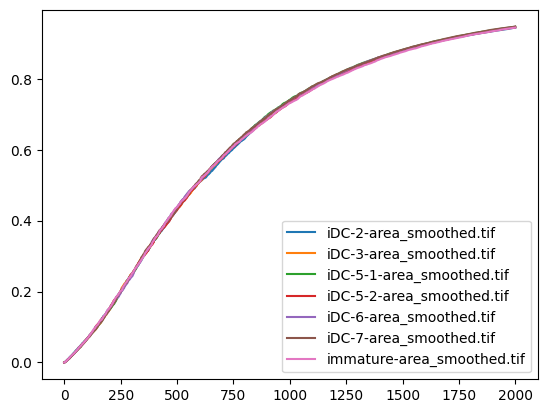

In [40]:
for k in immat_evals.keys():
    plt.plot(immat_evals[k], label=k)
plt.legend()
plt.show()

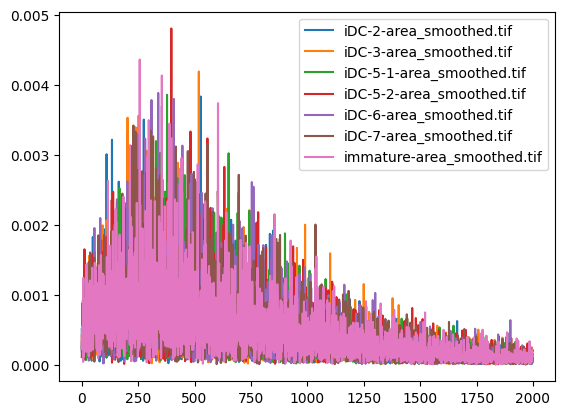

In [41]:
for k in immat_evals_d.keys():
    plt.plot(immat_evals_d[k], label=k)
plt.legend()
plt.show()

In [ ]:
for k in mat_evals.keys():
    plt.plot(mat_evals[k], label=k)
plt.legend()
plt.show()

In [ ]:
for k in mat_evals_d.keys():
    plt.plot(mat_evals_d[k], label=k)
plt.legend()
plt.show()

In [ ]:
from matplotlib.lines import Line2D
for k in mat_evals.keys():
    plt.plot(mat_evals_d[k][:], color="blue")
    break
for k in immat_evals.keys():
    plt.plot(immat_evals_d[k][:], color="orange")
    break
plt.legend(handles=[Line2D([0], [0], color='b', lw=2, label='Mature'), Line2D([0], [0], color='orange', lw=2, label='Immature')])
plt.show()